# Ejercicio 1

In [ ]:
!pip install numpy
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu_a = 1          #tiempo entre consultas al servicio (a)
mu_b = 2          #tiempo entre consultas al servicio (b)
mu_c = 4          #tiempo entre consultas al servicio (c)
p = 0.6           #probabilidad de ser atendido por base A
q = 1 - p         #probabilidad de ser atendido por base B
mu_1a = 0.7       #demora en responder una solicitud base A
mu_1b = 0.95      #demora en responder una solicitud base B
mu_2 = 0.8        #demora en responder una solicitud base unica
n = 100000        #cantidad de solicitudes procesadas
cant_simu = 100   #cantidad de simulaciones 

In [ ]:
def tiempo_espera(t_arribo,t_demora):
    t_espera = [0]
    n = len(t_arribo)
    for i in range(1,n):
        # - espera actual = llegada actual - (llegada anterior + espera anterior + demora anterior)
        # espera actual = - llegada actual + (demora anterior + espera anterior + llegada anterior)
        t_espera_actual = - t_arribo[i] + t_arribo[i-1] + t_espera[i-1] +  t_demora[i - 1]
        if(t_espera_actual < 0):
            t_espera_actual = 0
        t_espera.append(t_espera_actual)
    return t_espera

In [ ]:
def alternativa_1(mu,n,cant_simulaciones):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(cant_simulaciones):
      t_base_a=[]
      t_base_b=[]
      z = np.random.exponential(mu,n)                     # tiempos entre eventos del proceso de llegada
      t = np.concatenate(([0],np.cumsum(z)),axis=None)    # momentos donde llegan los eventos
      u = np.random.rand(n)
      for i in range(0,n):
          if (u[i] < p): 
              t_base_a.append(t[i])                     # responde la base a, momentos donde arriban los eventos a la base a
          else:
              t_base_b.append(t[i])                     # responde la base b, momentos donde arriban los eventos a la base a
      
      t_demora_base_a = np.random.exponential(mu_1a, len(t_base_a))       # tiempos de demora de la base a
      t_demora_base_b = np.random.exponential(mu_1b, len(t_base_b))       # tiempos de demora de la base b
      t_espera_base_a = tiempo_espera(t_base_a,t_demora_base_a)           # tiempos de espera de la base a
      t_espera_base_b = tiempo_espera(t_base_b,t_demora_base_b)           # tiempos de espera de la base b
      
      t_espera = np.concatenate((t_espera_base_a, t_espera_base_b))       # tiempos de espera de ambas bases
      t_demora = np.concatenate((t_demora_base_a, t_demora_base_b))       # tiempos de demora de ambas bases
      
      t_medio_espera = np.mean(t_espera)
      fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
      tasa_demora =  1 /np.mean(np.array(t_demora))
      tasa_espera =  1 /np.mean(np.array(t_espera))
      tasa_llegada = 1 /np.mean(np.array(z))
      tasa_finalizacion = tasa_demora + tasa_espera + tasa_llegada
      
      tasas_finalizacion.append(tasa_finalizacion)
      t_medios_espera.append(t_medio_espera)
      fraccion_no_espera.append(fracc_no_espera)

    print("alternativa 1 con {:d} simulaciones y mu: {:.2f}".format(cant_simulaciones,mu))
    print("tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))

    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
def alternativa_2(mu,n,cant_simulaciones):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(cant_simulaciones):
      z = np.random.exponential(mu,n)                         # tiempos entre eventos del proceso de llegada
      t = np.concatenate(([0],np.cumsum(z)),axis=None)        # momentos donde llegan los eventos
      t_demora = np.random.exponential(mu_2, len(t))          # tiempos de demora de la base 
      t_espera = tiempo_espera(t,t_demora)                    # tiempos de espera de la base a
      t_medio_espera = np.mean(t_espera)
      fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera) 
      tasa_demora =  1 /np.mean(np.array(t_demora))
      tasa_espera =  1 /np.mean(np.array(t_espera))
      tasa_llegada = 1 /np.mean(np.array(z))
      tasa_finalizacion = tasa_demora + tasa_espera + tasa_llegada
      tasas_finalizacion.append(tasa_finalizacion)
      t_medios_espera.append(t_medio_espera)
      fraccion_no_espera.append(fracc_no_espera)

    print("alternativa 2 con {:d} simulaciones y mu: {:.2f}".format(cant_simulaciones,mu))
    print("tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))

    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
esperas_alt1_mu1_sim_1 = alternativa_1(mu_a,n,1)
esperas_alt1_mu2_sim_1 = alternativa_1(mu_b,n,1)
esperas_alt1_mu4_sim_1 = alternativa_1(mu_c,n,1)

esperas_alt2_mu1_sim_1 = alternativa_2(mu_a,n,1)
esperas_alt2_mu2_sim_1 = alternativa_2(mu_b,n,1)
esperas_alt2_mu4_sim_1 = alternativa_2(mu_c,n,1)

alternativa 1 con 1 simulaciones y mu: 1.00
tiempo medio de espera: 0.5458 seg
fraccion de solicitudes que no esperaron: 0.59485
tasa de finalizacion de consultas: 4.0836259 seg 

alternativa 1 con 1 simulaciones y mu: 2.00
tiempo medio de espera: 0.2005 seg
fraccion de solicitudes que no esperaron: 0.79745
tasa de finalizacion de consultas: 6.7432896 seg 

alternativa 1 con 1 simulaciones y mu: 4.00
tiempo medio de espera: 0.0895 seg
fraccion de solicitudes que no esperaron: 0.89920
tasa de finalizacion de consultas: 12.6732311 seg 

alternativa 2 con 1 simulaciones y mu: 1.00
tiempo medio de espera: 3.2016 seg
fraccion de solicitudes que no esperaron: 0.19617
tasa de finalizacion de consultas: 2.5593235 seg 

alternativa 2 con 1 simulaciones y mu: 2.00
tiempo medio de espera: 0.5378 seg
fraccion de solicitudes que no esperaron: 0.59796
tasa de finalizacion de consultas: 3.5980649 seg 

alternativa 2 con 1 simulaciones y mu: 4.00
tiempo medio de espera: 0.2011 seg
fraccion de solicitu

In [ ]:
esperas_alt1_mu1_sim_100 = alternativa_1(mu_a,n,100)
esperas_alt1_mu2_sim_100 = alternativa_1(mu_b,n,100)
esperas_alt1_mu4_sim_100 = alternativa_1(mu_c,n,100)

esperas_alt2_mu1_sim_100 = alternativa_2(mu_a,n,100)
esperas_alt2_mu2_sim_100 = alternativa_2(mu_b,n,100)
esperas_alt2_mu4_sim_100 = alternativa_2(mu_c,n,100)

alternativa 1 con 100 simulaciones y mu: 1.00
tiempo medio de espera: 0.5374 seg
fraccion de solicitudes que no esperaron: 0.59586
tasa de finalizacion de consultas: 4.1117293 seg 

alternativa 1 con 100 simulaciones y mu: 2.00
tiempo medio de espera: 0.2006 seg
fraccion de solicitudes que no esperaron: 0.79807
tasa de finalizacion de consultas: 6.7349155 seg 

alternativa 1 con 100 simulaciones y mu: 4.00
tiempo medio de espera: 0.0890 seg
fraccion de solicitudes que no esperaron: 0.89919
tasa de finalizacion de consultas: 12.7428205 seg 

alternativa 2 con 100 simulaciones y mu: 1.00
tiempo medio de espera: 3.2172 seg
fraccion de solicitudes que no esperaron: 0.19986
tasa de finalizacion de consultas: 2.5606380 seg 

alternativa 2 con 100 simulaciones y mu: 2.00
tiempo medio de espera: 0.5333 seg
fraccion de solicitudes que no esperaron: 0.59999
tasa de finalizacion de consultas: 3.6252131 seg 

alternativa 2 con 100 simulaciones y mu: 4.00
tiempo medio de espera: 0.2000 seg
fraccion

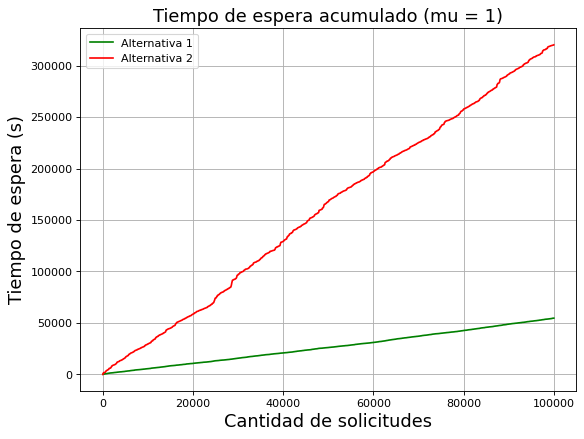

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu1_sim_1)), esperas_alt1_mu1_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu1_sim_1)), esperas_alt2_mu1_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 1)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

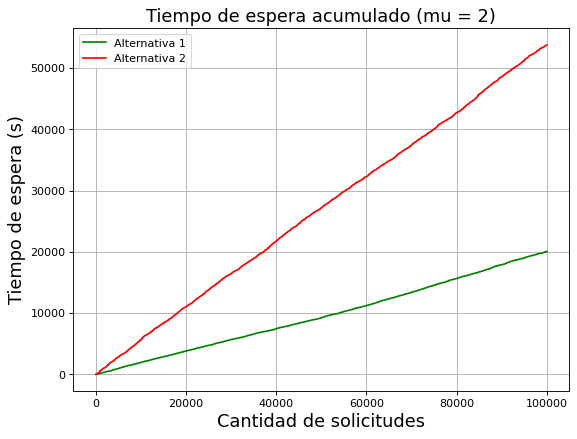

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu2_sim_1)), esperas_alt1_mu2_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu2_sim_1)), esperas_alt2_mu2_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 2)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

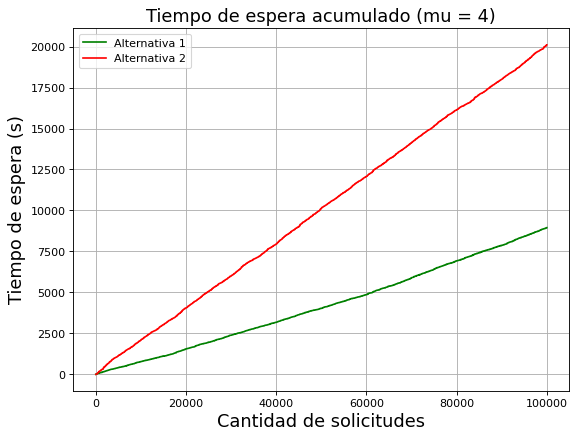

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas_alt1_mu4_sim_1)), esperas_alt1_mu4_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas_alt2_mu4_sim_1)), esperas_alt2_mu4_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 4)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Ejercicio 2


In [ ]:
import numpy as np
import numpy

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)

def myRoundPlot(x, S, I, R, T, x0, x1, y0, y1, dis_x, dis_y, titulo, \
           drawS, drawI, drawR, drawT):
    myPlot(x, np.around(S), np.around(I), np.around(R),np.around(T), x0, x1, y0, y1, dis_x, dis_y, titulo, \
           drawS, drawI, drawR, drawT)
    
def myPlot(x, S, I, R, T, x0, x1, y0, y1, dis_x, dis_y, titulo, \
           drawS, drawI, drawR, drawT):
    # Tamaño del gráfico. Debería ser proporcional a 
    # los límites de cada coordenada.
    grafico, ax = plt.subplots(figsize = (12, 12));

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tiempo", fontsize = 16);
    plt.ylabel("Cantidad de personas", fontsize = 16);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 10)
    plt.tick_params(axis='both', which='minor', labelsize = 10)

    # Discretización de los números que aparecen
    ax.xaxis.set_major_locator( MultipleLocator(dis_x) )
    ax.yaxis.set_major_locator( MultipleLocator(dis_y) )

    # Límites para cada coordenada
    plt.xlim([x0, x1]);
    plt.ylim([y0, y1]);

    # Tipo de gráfico y color 
    if (drawS):
      ax.plot(x, S, 'C1', label='Sanos', color = "green")
    
    if (drawI):
      plt.plot(x, I,'C2', label='Infectados', color = "yellow")
    
    if (drawR):
      plt.plot(x, R,'C3', label='Hospitalizados', color = "orange")
    
    if (drawT):
      plt.plot(x, T,'C4', label='Terapia Intensiva', color = "red")
    plt.legend()
    ax.legend(fontsize="x-large")

In [ ]:
Efficent_Mark = numpy.array([[0.95, 0.05, 0.0], [0.10,0.70,0.2], [0.0,0.30,0.7]])
starting_array = np.array([10,0,0])

In [ ]:
hea_array = []
inf_array = []
hos_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    x.append(i)
    transition_array = numpy.matmul(transition_array,Efficent_Mark,)
    

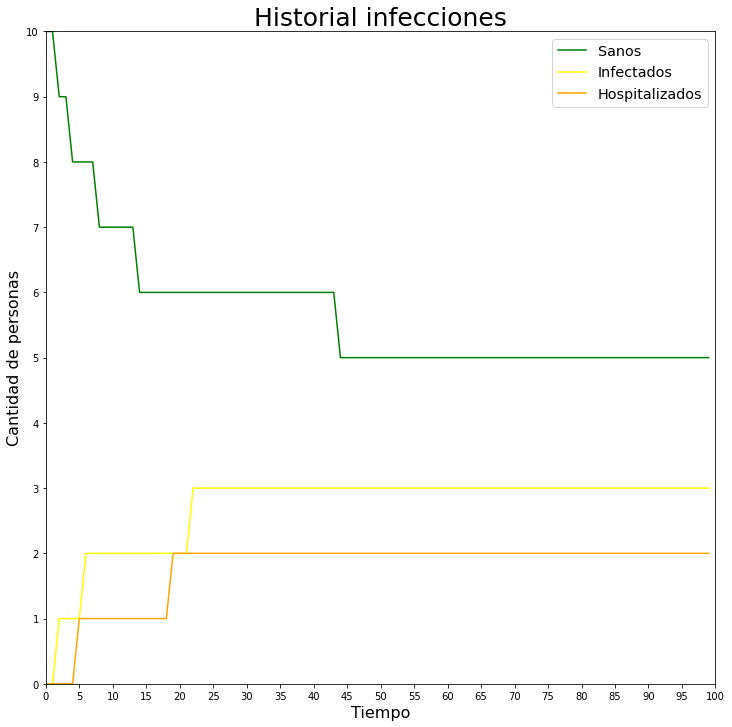

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array,[], 0, 100, 0, 10, 5, 1, "Historial infecciones", True,True,True,False)

In [ ]:
Unefficent_Mark = numpy.array([[0.90, 0.1, 0.0], [0.12,0.70,0.18], [0.0,0.20,0.8]])
starting_array = np.array([10,0,0])
hea_array = []
inf_array = []
hos_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    x.append(i)
    transition_array = numpy.matmul(transition_array,Unefficent_Mark,)

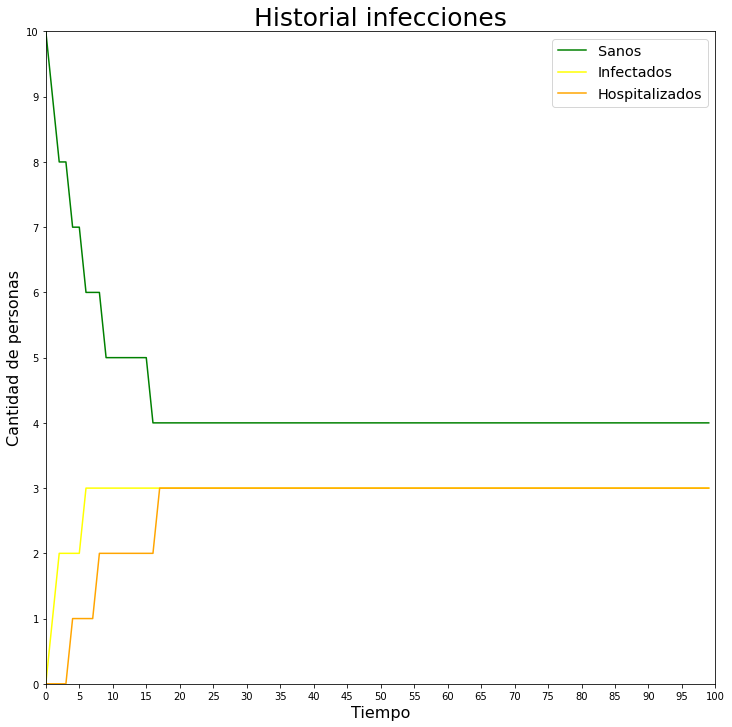

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array, [], 0, 100, 0, 10, 5, 1, "Historial infecciones", True,True,True,False)

In [ ]:
death_Mark = numpy.array([[0.93, 0.07, 0.0 , 0.0, 0.0], 
                          [0.05, 0.80, 0.10, 0.05, 0.00], 
                          [0.0, 0.15, 0.80, 0.05, 0.00],
                          [0.00, 0.00, 0.05, 0.80, 0.15],
                          [0.00, 0.00, 0.00, 0.00, 1.00]])
starting_array = np.array([10,0,0,0,0])
hea_array = []
inf_array = []
hos_array = []
ter_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    ter_array.append(transition_array[3])
    x.append(i)
    transition_array = numpy.matmul(transition_array,death_Mark,)

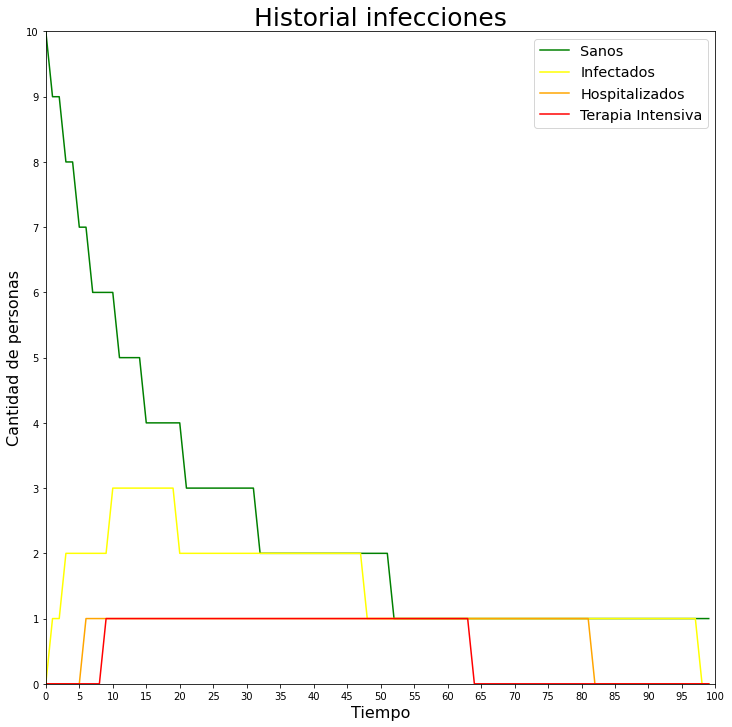

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array, ter_array, 0, 100, 0, 10, 5, 1, "Historial infecciones", True,True,True,True)

ICU_Mark = numpy.array([[0.93, 0.07, 0.0 , 0.0], 
                          [0.05, 0.80, 0.10, 0.05], 
                          [0.0, 0.15, 0.80, 0.05],
                          [0.00, 0.00, 0.05, 0.80]])
starting_array = np.array([10,0,0,0])
hea_array = []
inf_array = []
hos_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    x.append(i)
    transition_array = numpy.matmul(transition_array,ICU_Mark,)

In [ ]:
Efficent_Mark = numpy.array([[0.95, 0.05, 0.0], [0.10,0.70,0.2], [0.0,0.30,0.7]])
starting_array = np.array([10000,0,0])
hea_array = []
inf_array = []
hos_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    x.append(i)
    transition_array = numpy.matmul(transition_array,Efficent_Mark,)
    

5454.676621947347
2727.2071435717594
1818.116234480854


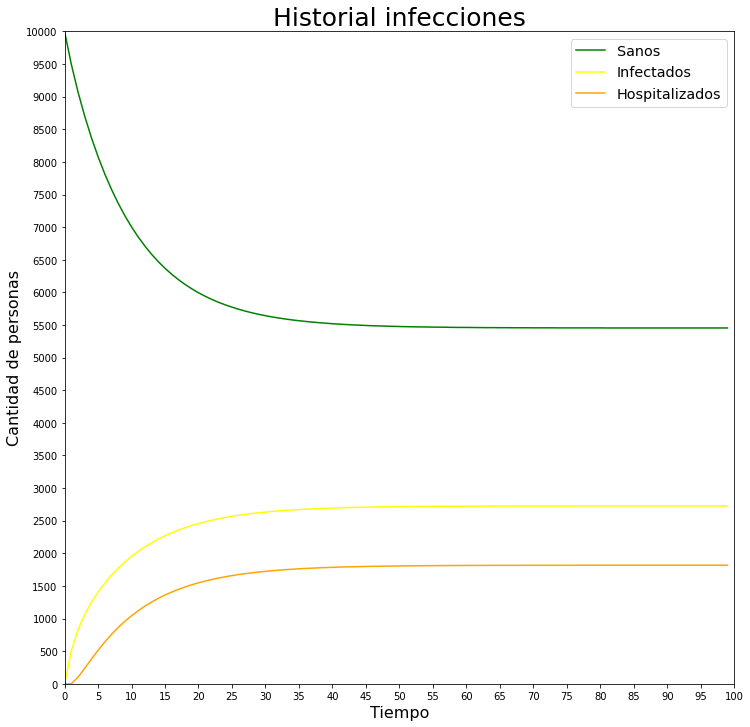

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array,[], 0, 100, 0, 10000, 5, 500, "Historial infecciones", True,True,True,False)
print(hea_array[99])
print(inf_array[99])
print(hos_array[99])

In [ ]:
Unefficent_Mark = numpy.array([[0.90, 0.1, 0.0], [0.12,0.70,0.18], [0.0,0.20,0.8]])
starting_array = np.array([10000,0,0])
hea_array = []
inf_array = []
hos_array = []
x = []
transition_array = starting_array
for i in range(0,100):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    x.append(i)
    transition_array = numpy.matmul(transition_array,Unefficent_Mark,)

3870.9719711237976
3225.8053002870615
2903.222728589149


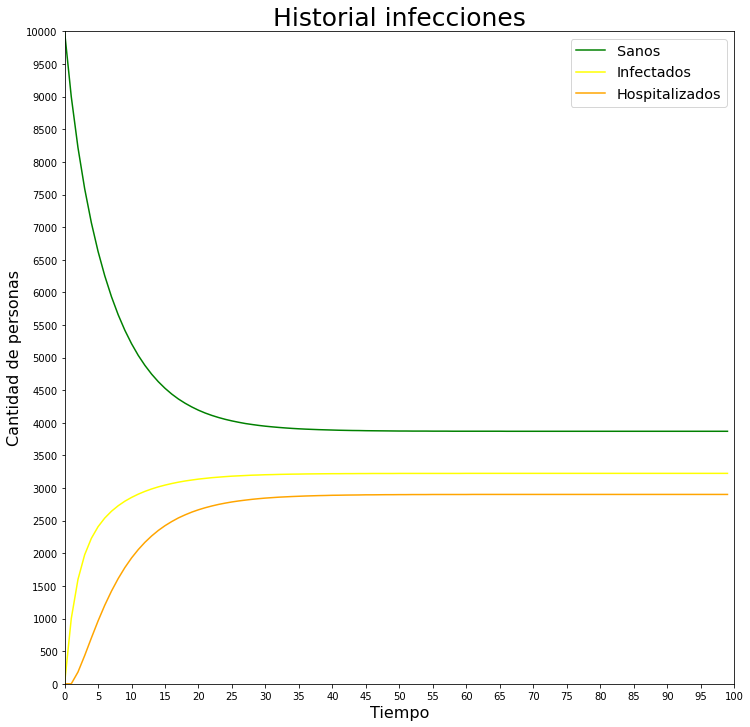

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array,[], 0, 100, 0, 10000, 5, 500, "Historial infecciones", True,True,True,False)
print(hea_array[99])
print(inf_array[99])
print(hos_array[99])

In [ ]:
death_Mark = numpy.array([[0.93, 0.07, 0.0 , 0.0, 0.0], 
                          [0.05, 0.80, 0.10, 0.05, 0.00], 
                          [0.0, 0.15, 0.80, 0.05, 0.00],
                          [0.00, 0.00, 0.05, 0.80, 0.15],
                          [0.00, 0.00, 0.00, 0.00, 1.00]])
starting_array = np.array([10000,0,0,0,0])
hea_array = []
inf_array = []
hos_array = []
ter_array = []
dead_array = []
x = []
transition_array = starting_array
for i in range(0,10000):
    hea_array.append(transition_array[0])
    inf_array.append(transition_array[1])
    hos_array.append(transition_array[2])
    ter_array.append(transition_array[3])
    dead_array.append(transition_array[4])
    x.append(i)
    transition_array = numpy.matmul(transition_array,death_Mark,)

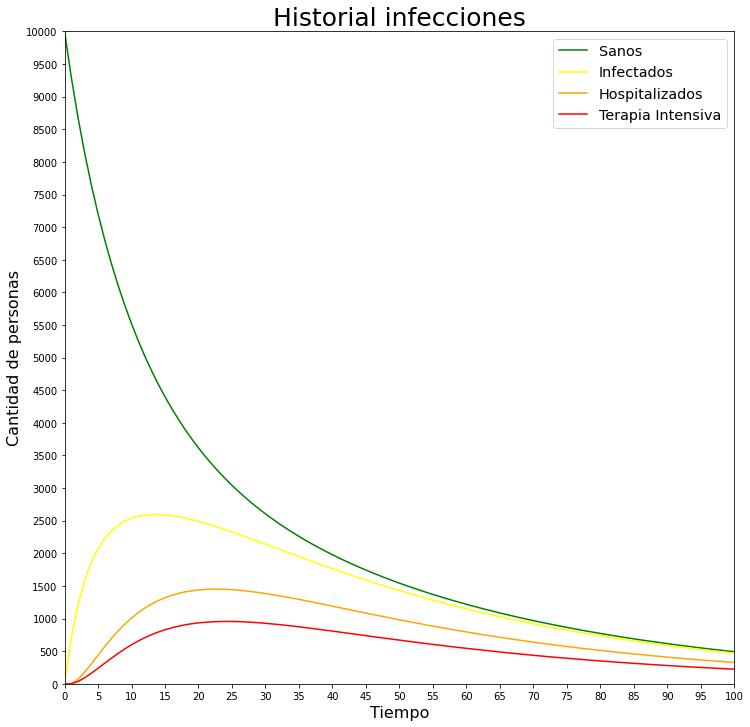

In [ ]:
myRoundPlot(x, hea_array, inf_array, hos_array, ter_array, 0, 100, 0, 10000, 5, 500, "Historial infecciones", True,True,True,True)


In [ ]:
amount_died_in_instance = []
for i in range(0,9999):
    amount_died_in_instance.append(dead_array[i+1]-dead_array[i])

In [ ]:
sum_parcial_100_dias = 0
for i in range(1,100):
    sum_parcial_100_dias = sum_parcial_100_dias + amount_died_in_instance[i-1] * i
death_promedio = sum_parcial_100_dias/dead_array[100]
print("muertos en los primeros 100 dias: " + str(np.around(dead_array[99])) + " promedio que toman en morir en los primeros 100 dias: " + str(np.around(death_promedio)))

muertos en los primeros 100 dias: 8453.0 promedio que toman en morir en los primeros 100 dias: 44.0


In [ ]:
sum_parcial_10000 = 0
for i in range(1,10000):
    sum_parcial_10000 = sum_parcial_10000 + amount_died_in_instance[i-1] * (i)
death_promedio = sum_parcial_10000/10000
death_promedio

59.52380952380646

# Ejercicio 3

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import math
import numpy as np

### Modelo epidemiológico

In [ ]:
def sir(t, s, i, r, alpha, beta, N):
    ds = - alpha * s * i / N
    di = alpha * s * i / N - beta * i
    dr = beta * i
    return ds, di, dr

In [ ]:
def rk4_sir(f, t, h, y, alpha, beta, N):
  s, i, r = y
  k1s, k1i, k1r = [ h * x for x in f(t, s, i, r, alpha, beta, N) ]
  k2s, k2i, k2r = [ h * x for x in f(t + h / 2, s + k1s / 2, i + k1i / 2, r + k1r / 2, alpha, beta, N) ]
  k3s, k3i, k3r = [ h * x for x in f(t + h / 2, s + k2s / 2, i + k2i / 2, r + k2r / 2, alpha, beta, N) ]
  k4s, k4i, k4r = [ h * x for x in f(t + h, s + k3s, i + k3i, r + k3r, alpha, beta, N) ]
  s = s + (k1s + 2 * k2s + 2 * k3s + k4s) / 6
  i = i + (k1i + 2 * k2i + 2 * k3i + k4i) / 6
  r = r + (k1r + 2 * k2r + 2 * k3r + k4r) / 6
  return s, i, r

In [ ]:
alpha = 0.27
beta = 0.043

N = 15000
i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

In [ ]:
def myPlot(x, S, I, R, x0, x1, y0, y1, dis_x, dis_y, titulo, \
           drawS, drawI, drawR):
    # Tamaño del gráfico. Debería ser proporcional a 
    # los límites de cada coordenada.
    grafico, ax = plt.subplots(figsize = (12, 12));

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tiempo", fontsize = 16);
    plt.ylabel("Cantidad de personas", fontsize = 16);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 10)
    plt.tick_params(axis='both', which='minor', labelsize = 10)

    # Discretización de los números que aparecen
    ax.xaxis.set_major_locator( MultipleLocator(dis_x) )
    ax.yaxis.set_major_locator( MultipleLocator(dis_y) )

    # Límites para cada coordenada
    plt.xlim([x0, x1]);
    plt.ylim([y0, y1]);

    # Tipo de gráfico y color 
    if (drawS):
      plt.plot(x, S, color = "orange", label='Susceptibles',)
    
    if (drawI):
      plt.plot(x, I, color = "red", label='Infectados')
    
    if (drawR):
      plt.plot(x, R, color = "green", label='Sanos',)
    
    plt.legend()
    ax.legend(fontsize="x-large")

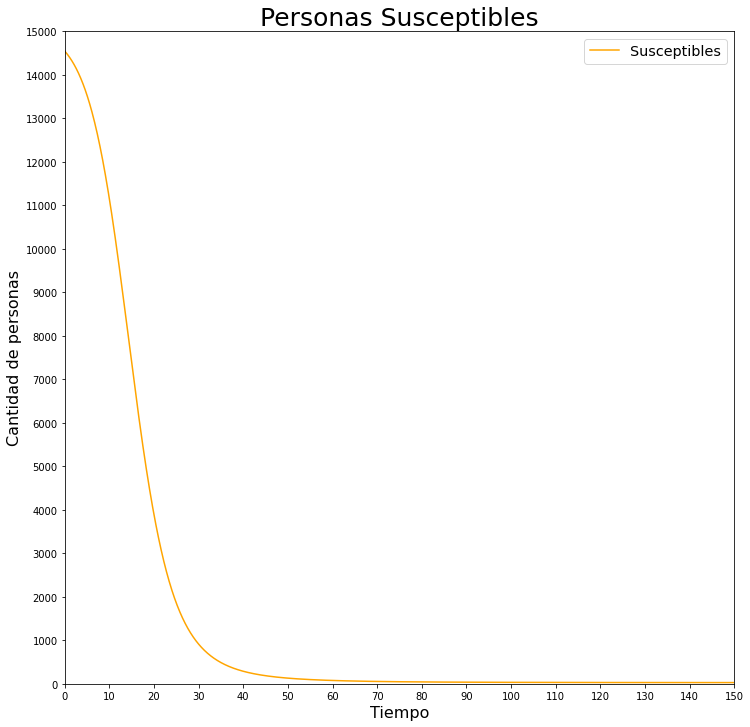

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Susceptibles", True, False, False)

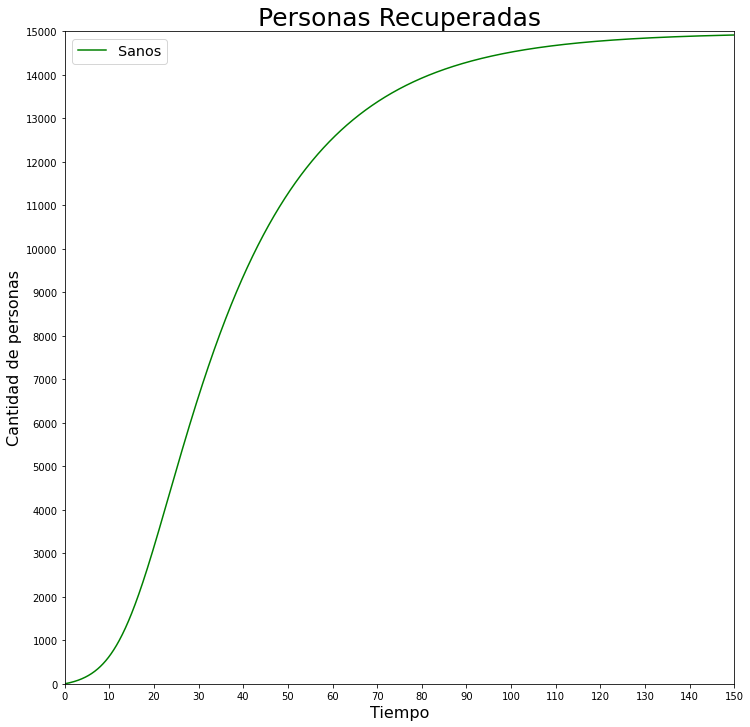

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Recuperadas", False, False, True)

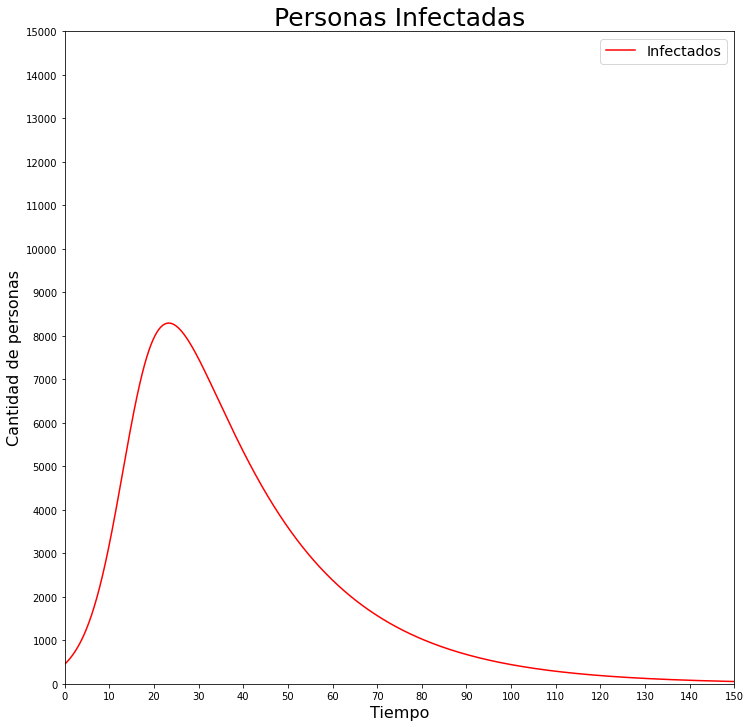

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Personas Infectadas", False, True, False)

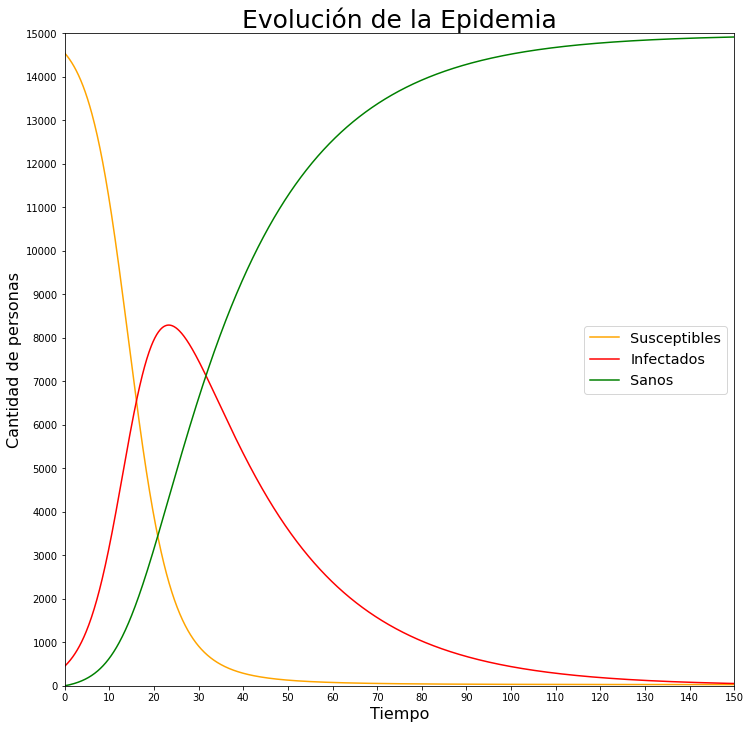

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia", True, True, True)

In [ ]:
beta / alpha * N

2388.8888888888887

In [ ]:
S.index(2392.386098486799) / discretization 

23.3

In [ ]:
I[233]

8294.953367299471

### Consideración de la capacidad límite de atención


In [ ]:
alpha = 0.12
beta = 0.043

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 200
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

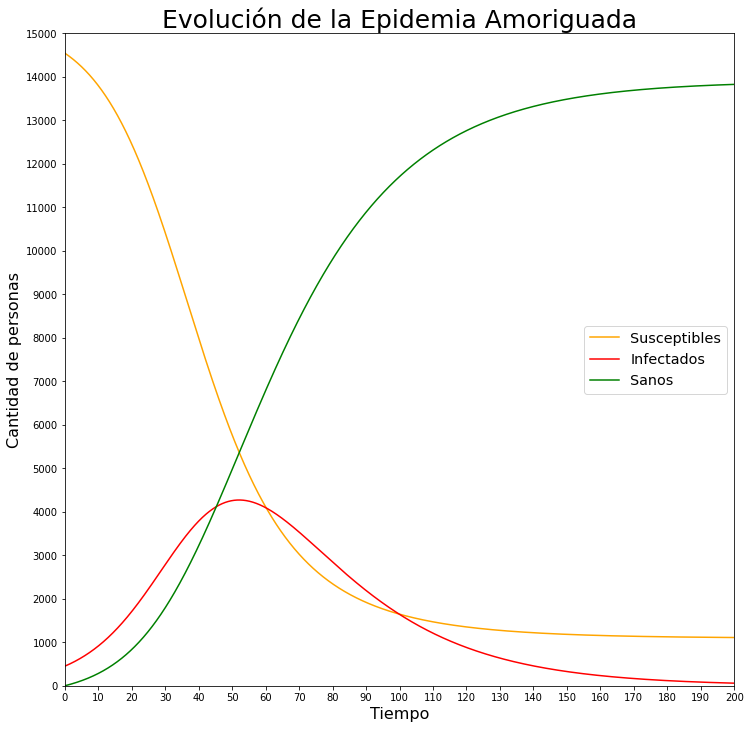

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Amoriguada", True, True, True)

In [ ]:
beta / alpha * N

5375.0

In [ ]:
S.index(4800.338097755035) / discretization 

55.4

In [ ]:
I[554] / N

0.2826199637366731

In [ ]:
I[554]

4239.2994560500965

### Modelo alternativo: duplicando la tasa de infección 

In [ ]:
alpha = 0.54
beta = 0.043

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

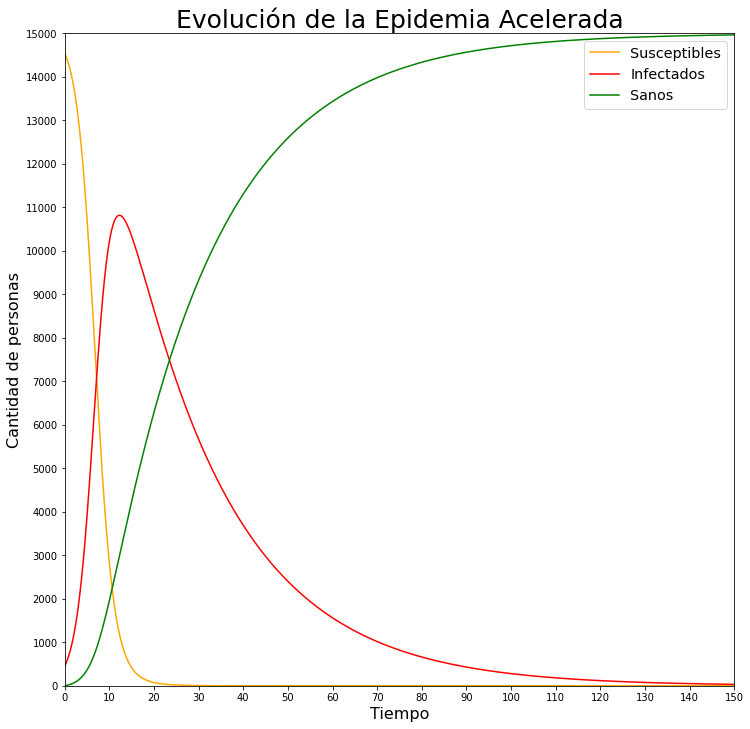

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Acelerada", True, True, True)

In [ ]:
beta / alpha * N

1194.4444444444443

In [ ]:
S.index(4755.725722646705) / discretization 

8.5

In [ ]:
I[85] / N

0.5939064467978297

### Modelo alternativo: enfermedad de rápida recuperación

In [ ]:
alpha = 0.27
beta = 0.2

i = 0.03 * N
s = N - i
r = 0
y = s, i, r
t_max = 240
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

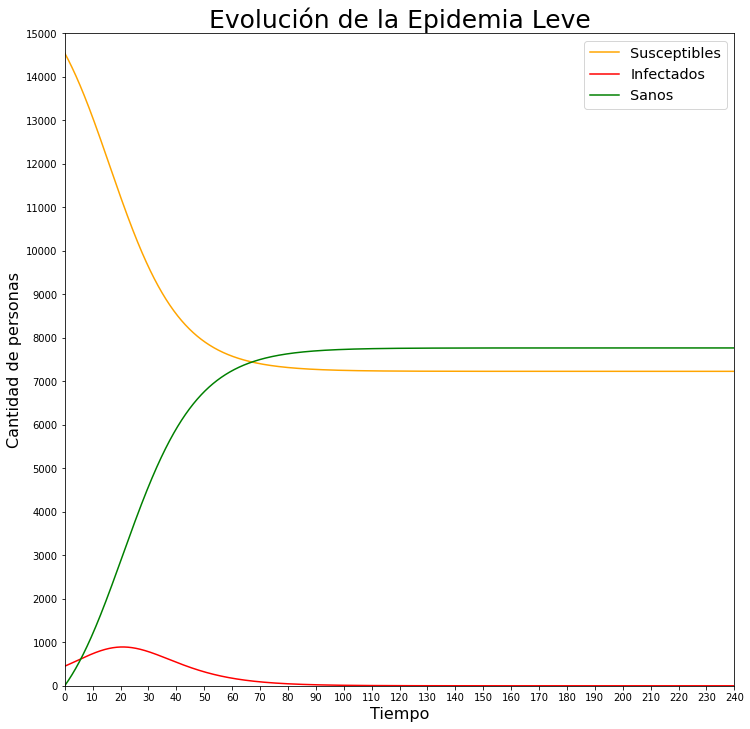

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Leve", True, True, True)

### Modelo alternativo: alto porcentaje de infectados iniciales

In [ ]:
alpha = 0.27
beta = 0.043

N = 15000
i = 0.30 * N
s = N - i
r = 0
y = s, i, r
t_max = 150
t = np.linspace(0, t_max, t_max)
dt = 0.1

discretization = 10
ts = [ t / discretization  for t in range(0, t_max * discretization) ]
S = []
I = []
R = []

for t in ts:
  s, i, r = y
  S.append(s)
  I.append(i)
  R.append(r)
  y = rk4_sir(sir, t, dt, y, alpha, beta, N)

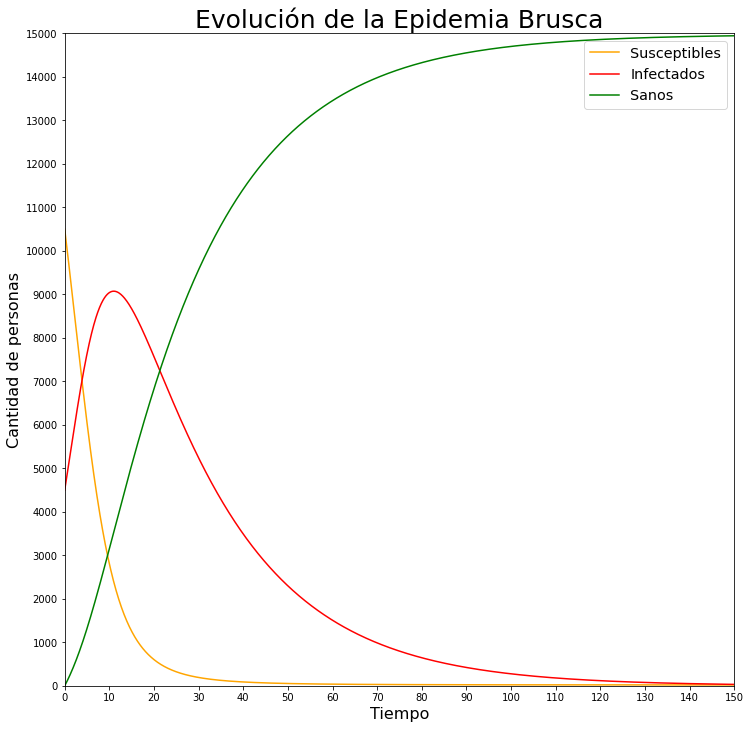

In [ ]:
myPlot(ts, S, I, R, 0, t_max, 0, N, 10, 1000, "Evolución de la Epidemia Brusca", True, True, True)

# Ejercicio 4

In [ ]:
! pip install simpy

In [ ]:
import simpy

In [ ]:
class Database:
    def __init__(self, resource, mu):
        self.resource = resource
        self.mu = mu

In [ ]:
def requests1(env, n, mu, databaseA, databaseB, z, t, t_espera, t_demora):
    for i in range(n):
        
        zi = np.random.exponential(mu)
        z.append(zi)
        yield env.timeout(zi)
        
        env.process(query1(env, databaseA, databaseB, z, t, t_espera, t_demora))

In [ ]:
def query1(env, databaseA, databaseB, z, t, t_espera, t_demora):
    
    arrival = env.now
    t.append(arrival)
    
    if (np.random.rand() < p):
        database = databaseA
    else:
        database = databaseB
    
    with database.resource.request() as db:
        yield db

        wait = env.now - arrival
        t_espera.append(wait)

        di = np.random.exponential(database.mu)
        t_demora.append(di)
        yield env.timeout(di)

In [ ]:
def simulate_4_alt1(simulations, mu):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(simulations):
        z = []
        t = []
        t_espera = []
        t_demora = []
        
        # Simulacion
        env = simpy.Environment()
        databaseA = Database(simpy.Resource(env, capacity=1), mu_1a)
        databaseB = Database(simpy.Resource(env, capacity=1), mu_1b)
        env.process(requests1(env, n, mu, databaseA, databaseB, z, t, t_espera, t_demora))
        env.run()
        
        # Procesamiento de resultados
        t_medio_espera = np.mean(t_espera)
        fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
        tasa_llegada = 1 /np.mean(np.array(z))
        tasa_espera =  1 /np.mean(np.array(t_espera))
        tasa_demora =  1 /np.mean(np.array(t_demora))
        tasa_finalizacion = tasa_llegada + tasa_espera + tasa_demora

        t_medios_espera.append(t_medio_espera)
        tasas_finalizacion.append(tasa_finalizacion)
        fraccion_no_espera.append(fracc_no_espera)
        
    print("RESULTS")
    print("Alternativa 1 con {:d} simulaciones y mu: {:d}".format(simulations, mu))
    print("Tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("Fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("Tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))
    
    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
esperas4_alt1_mu1_sim_1 = simulate_4_alt1(1, mu_a)
esperas4_alt1_mu2_sim_1 = simulate_4_alt1(1, mu_b)
esperas4_alt1_mu4_sim_1 = simulate_4_alt1(1, mu_c)

RESULTS
Alternativa 1 con 1 simulaciones y mu: 1
Tiempo medio de espera: 0.5402 seg
Fraccion de solicitudes que no esperaron: 0.59768
Tasa de finalizacion de consultas: 4.1120112 seg 

RESULTS
Alternativa 1 con 1 simulaciones y mu: 2
Tiempo medio de espera: 0.2004 seg
Fraccion de solicitudes que no esperaron: 0.79904
Tasa de finalizacion de consultas: 6.7448799 seg 

RESULTS
Alternativa 1 con 1 simulaciones y mu: 4
Tiempo medio de espera: 0.0891 seg
Fraccion de solicitudes que no esperaron: 0.89692
Tasa de finalizacion de consultas: 12.7225176 seg 



In [ ]:
simulate_4_alt1(cant_simu, mu_a)
simulate_4_alt1(cant_simu, mu_b)
simulate_4_alt1(cant_simu, mu_c)

RESULTS
Alternativa 1 con 100 simulaciones y mu: 1
Tiempo medio de espera: 0.5389 seg
Fraccion de solicitudes que no esperaron: 0.59553
Tasa de finalizacion de consultas: 4.1060587 seg 

RESULTS
Alternativa 1 con 100 simulaciones y mu: 2
Tiempo medio de espera: 0.2009 seg
Fraccion de solicitudes que no esperaron: 0.79816
Tasa de finalizacion de consultas: 6.7291389 seg 

RESULTS
Alternativa 1 con 100 simulaciones y mu: 4
Tiempo medio de espera: 0.0889 seg
Fraccion de solicitudes que no esperaron: 0.89918
Tasa de finalizacion de consultas: 12.7499584 seg 



array([   0.        ,    0.        ,    0.        , ..., 8893.15384327,
       8893.15384327, 8893.15384327])

In [ ]:
def requests2(env, n, mu, database, z, t, t_espera, t_demora):
    for i in range(n):
        
        zi = np.random.exponential(mu)
        z.append(zi)
        yield env.timeout(zi)
        
        env.process(query2(env, database, z, t, t_espera, t_demora))

In [ ]:
def query2(env, database, z, t, t_espera, t_demora):
    
    arrival = env.now
    t.append(arrival)
    
    with database.resource.request() as db:
        yield db
        
        wait = env.now - arrival
        t_espera.append(wait)
        
        di = np.random.exponential(database.mu)
        t_demora.append(di)
        yield env.timeout(di)

In [ ]:
def simulate_4_alt2(simulations, mu):
    t_medios_espera = []
    tasas_finalizacion = []
    fraccion_no_espera = []
    for i in range(simulations):
        z = []
        t = []
        t_espera = []
        t_demora = []
        
        # Simulacion
        env = simpy.Environment()
        database = Database(simpy.Resource(env, capacity=1), mu_2)
        env.process(requests2(env, n, mu, database, z, t, t_espera, t_demora))
        env.run()
        
        # Procesamiento de resultados
        t_medio_espera = np.mean(t_espera)
        fracc_no_espera = (len(t_espera) - np.count_nonzero(t_espera))/len(t_espera)
        tasa_llegada = 1 /np.mean(np.array(z))
        tasa_espera =  1 /np.mean(np.array(t_espera))
        tasa_demora =  1 /np.mean(np.array(t_demora))
        tasa_finalizacion = tasa_llegada + tasa_espera + tasa_demora

        t_medios_espera.append(t_medio_espera)
        tasas_finalizacion.append(tasa_finalizacion)
        fraccion_no_espera.append(fracc_no_espera)
        
    print("RESULTS")
    print("Alternativa 2 con {:d} simulaciones y mu: {:d}".format(simulations, mu))
    print("Tiempo medio de espera: {:.4f} seg".format(np.mean(t_medios_espera)))
    print("Fraccion de solicitudes que no esperaron: {:.5f}".format(np.mean(fraccion_no_espera)))
    print("Tasa de finalizacion de consultas: {:.7f} seg \n".format(np.mean(tasas_finalizacion)))
    
    return np.concatenate(([0],np.cumsum(t_espera)),axis=None)

In [ ]:
esperas4_alt2_mu1_sim_1 = simulate_4_alt2(1, mu_a)
esperas4_alt2_mu2_sim_1 = simulate_4_alt2(1, mu_b)
esperas4_alt2_mu4_sim_1 = simulate_4_alt2(1, mu_c)

RESULTS
Alternativa 2 con 1 simulaciones y mu: 1
Tiempo medio de espera: 3.2156 seg
Fraccion de solicitudes que no esperaron: 0.20073
Tasa de finalizacion de consultas: 2.5601232 seg 

RESULTS
Alternativa 2 con 1 simulaciones y mu: 2
Tiempo medio de espera: 0.5437 seg
Fraccion de solicitudes que no esperaron: 0.59878
Tasa de finalizacion de consultas: 3.5906460 seg 

RESULTS
Alternativa 2 con 1 simulaciones y mu: 4
Tiempo medio de espera: 0.1954 seg
Fraccion de solicitudes que no esperaron: 0.80285
Tasa de finalizacion de consultas: 6.6195119 seg 



In [ ]:
simulate_4_alt2(cant_simu, mu_a)
simulate_4_alt2(cant_simu, mu_b)
simulate_4_alt2(cant_simu, mu_c)

RESULTS
Alternativa 2 con 100 simulaciones y mu: 1
Tiempo medio de espera: 3.1868 seg
Fraccion de solicitudes que no esperaron: 0.20068
Tasa de finalizacion de consultas: 2.5647364 seg 

RESULTS
Alternativa 2 con 100 simulaciones y mu: 2
Tiempo medio de espera: 0.5338 seg
Fraccion de solicitudes que no esperaron: 0.60003
Tasa de finalizacion de consultas: 3.6238625 seg 

RESULTS
Alternativa 2 con 100 simulaciones y mu: 4
Tiempo medio de espera: 0.2007 seg
Fraccion de solicitudes que no esperaron: 0.79978
Tasa de finalizacion de consultas: 6.4828080 seg 



array([0.00000000e+00, 0.00000000e+00, 1.73529224e+00, ...,
       1.97622264e+04, 1.97622264e+04, 1.97638817e+04])

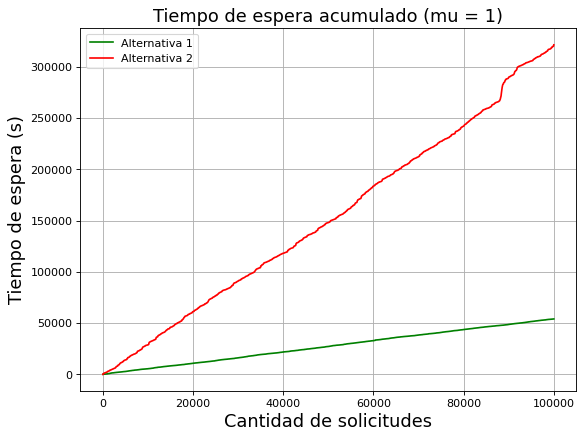

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu1_sim_1)), esperas4_alt1_mu1_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu1_sim_1)), esperas4_alt2_mu1_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 1)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

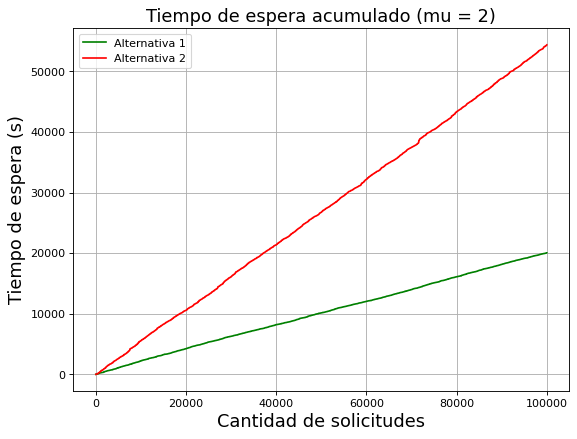

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu2_sim_1)), esperas4_alt1_mu2_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu2_sim_1)), esperas4_alt2_mu2_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 2)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()

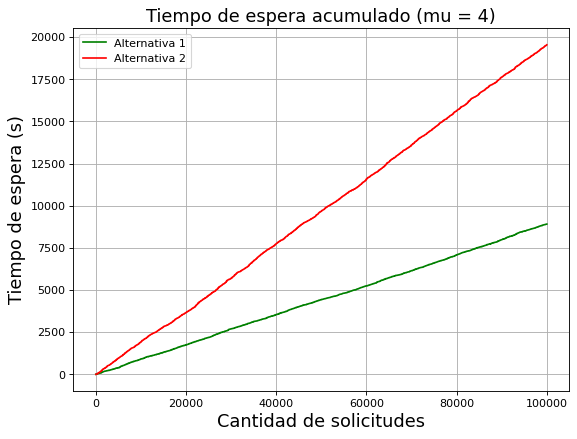

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.step(range(len(esperas4_alt1_mu4_sim_1)), esperas4_alt1_mu4_sim_1, where='post', color='green', label='Alternativa 1')
plt.step(range(len(esperas4_alt2_mu4_sim_1)), esperas4_alt2_mu4_sim_1, where='post', color='red', label='Alternativa 2')

plt.title('Tiempo de espera acumulado (mu = 4)', fontsize=16)
plt.ylabel('Tiempo de espera (s)', fontsize=16)
plt.xlabel('Cantidad de solicitudes', fontsize=16)
plt.legend()
plt.grid()
plt.show()